In [159]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [160]:
structuring_elements1 = np.ones((1, 2))
structuring_elements2 = np.ones((3, 3))
structuring_elements3 = np.ones((15, 15))
structuring_elements4 = np.ones((9, 9))
structuring_elements5 = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])

struct_el = [structuring_elements1, structuring_elements2, structuring_elements5, structuring_elements4, structuring_elements3]

elements = [f'{struct_el[0]}', 'np.ones((3, 3))', 'np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])', 'np.ones((9, 9))', 'np.ones((15, 15))']

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
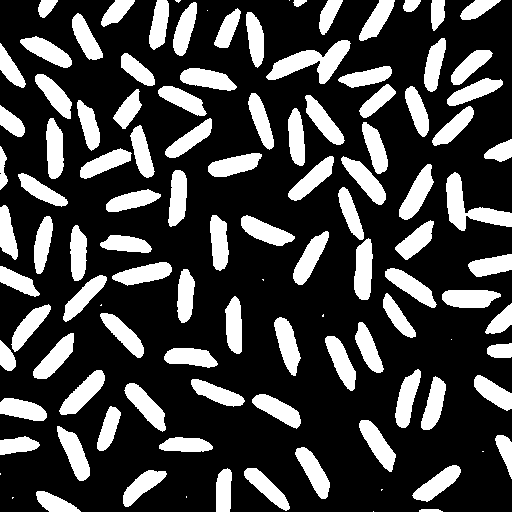

In [161]:
binary_image = Image.open('ricegrains_mono.bmp')
binary_image = np.array(binary_image)

binary_image

## Erosion:

In [162]:
def ErodeBinary(image, element):
    imgsh = image.shape
    eroded = np.zeros(imgsh)

    if len(element.shape) < 2:
        shape = (element.shape[0], 1)
    else:
        shape = element.shape

    pad_h, pad_w = shape[0] // 2, shape[1] // 2
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    padded[padded == 255] = 1

    for i in range(imgsh[0]):
        for j in range(imgsh[1]):
            region = padded[i:i+shape[0], j:j+shape[1]]
            if np.min(region[element == 1]) == 1:
                eroded[i, j] = 1

    return eroded

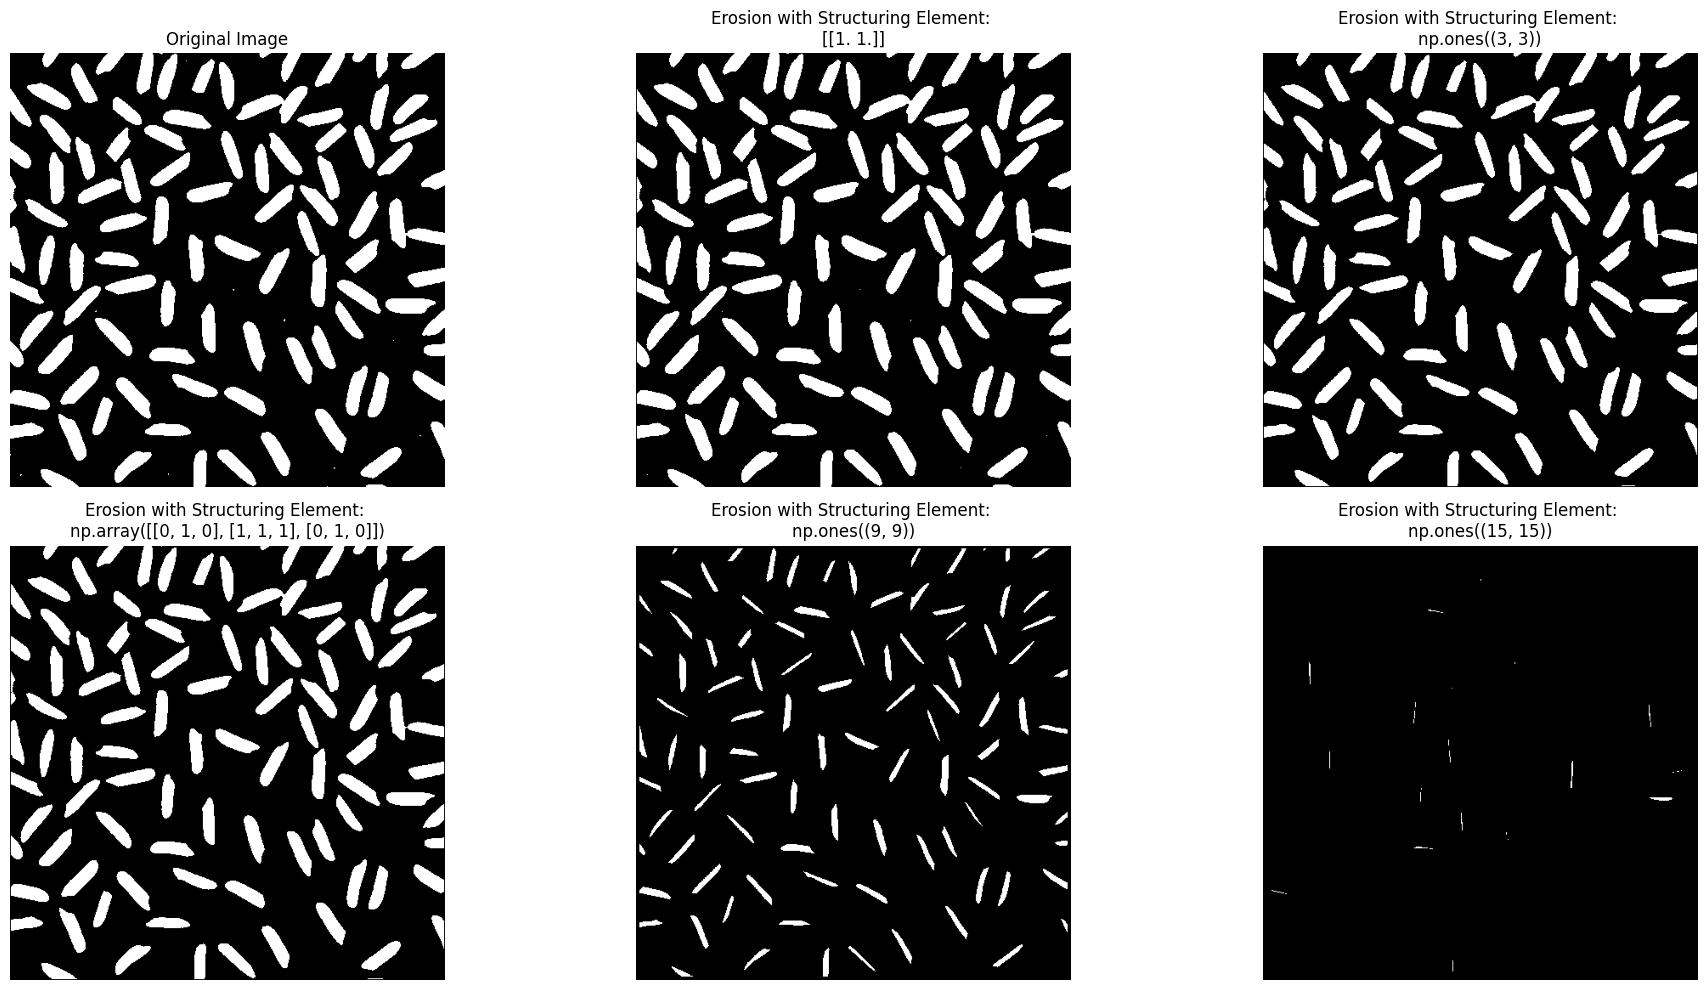

In [163]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

for i in range(len(struct_el)):
    eroded_image = ErodeBinary(binary_image, struct_el[i])
    plt.subplot(2, 3, i + 2)
    plt.imshow(eroded_image, cmap='gray')
    plt.title(f"Erosion with Structuring Element: \n{elements[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Dilation:

In [164]:
def DilateBinary(image, element):
    imgsh = image.shape
    dilated = np.zeros(imgsh)

    if len(element.shape) < 2:
        shape = (element.shape[0], 1)
    else:
        shape = element.shape

    pad_h, pad_w = shape[0] // 2, shape[1] // 2
    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    padded[padded==255] = int(1)

    for i in range(imgsh[0]):
        for j in range(imgsh[1]):
            region = padded[i:i+shape[0], j:j+shape[1]]
            prod = np.multiply(region, element)

            if np.max(prod) == 1:
                dilated[i, j] = 1

    return dilated

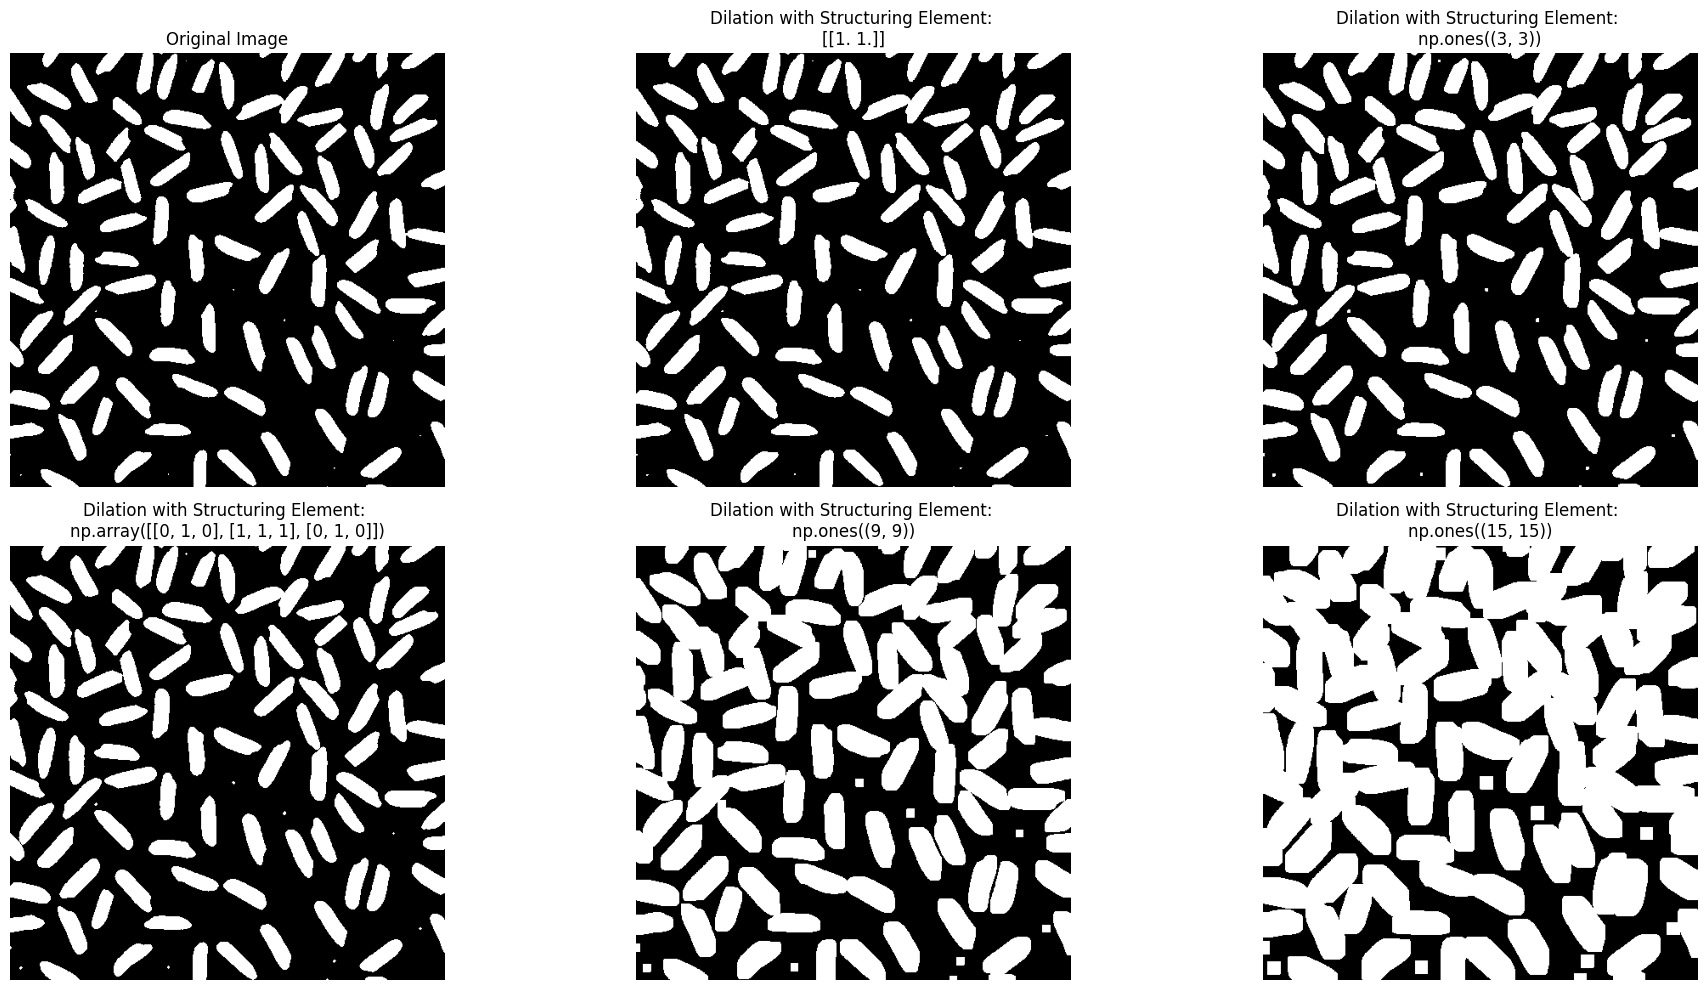

In [165]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

for i in range(len(struct_el)):
    dilated_image = DilateBinary(binary_image, struct_el[i])
    plt.subplot(2, 3, i + 2)
    plt.imshow(dilated_image, cmap='gray')
    plt.title(f"Dilation with Structuring Element: \n{elements[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Opening:

In [166]:
def OpenBinary(image, element):
    eroded = ErodeBinary(image, element)
    opened = DilateBinary(eroded, element)

    return opened

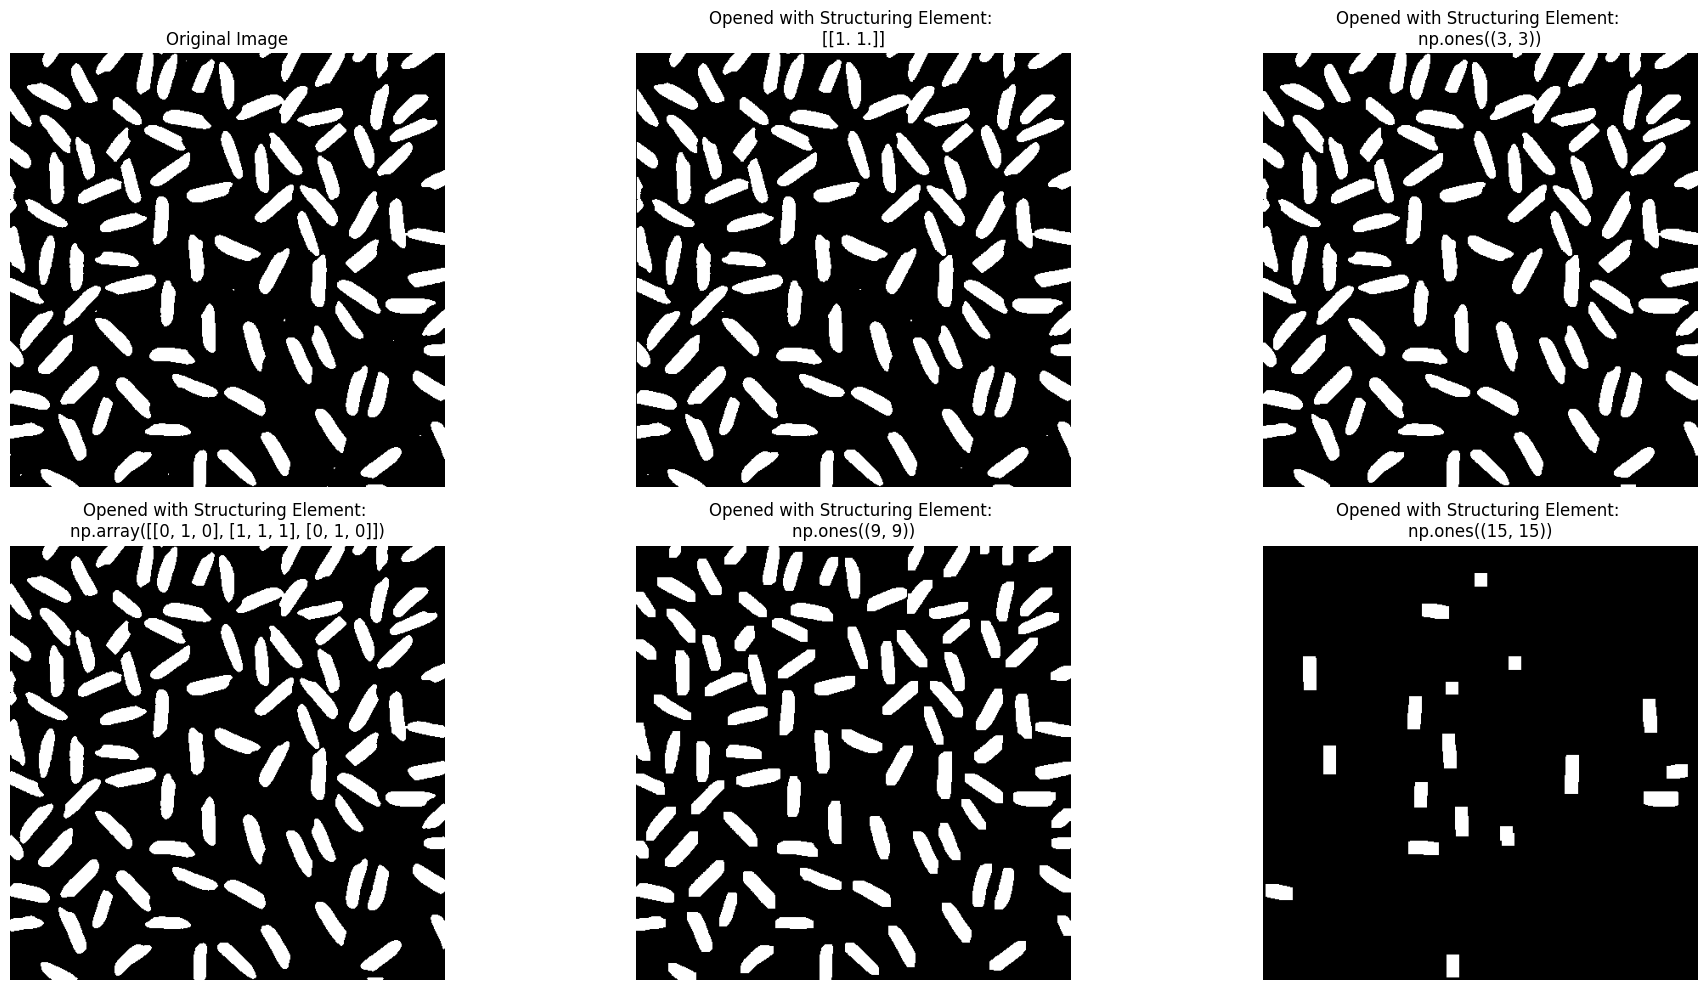

In [167]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

for i in range(len(struct_el)):
    opened_image = OpenBinary(binary_image, struct_el[i])
    plt.subplot(2, 3, i + 2)
    plt.imshow(opened_image, cmap='gray')
    plt.title(f"Opened with Structuring Element: \n{elements[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## Closing:

In [168]:
def CloseBinary(image, element):
    dilated = DilateBinary(image, element)
    closed = ErodeBinary(dilated, element)

    return closed

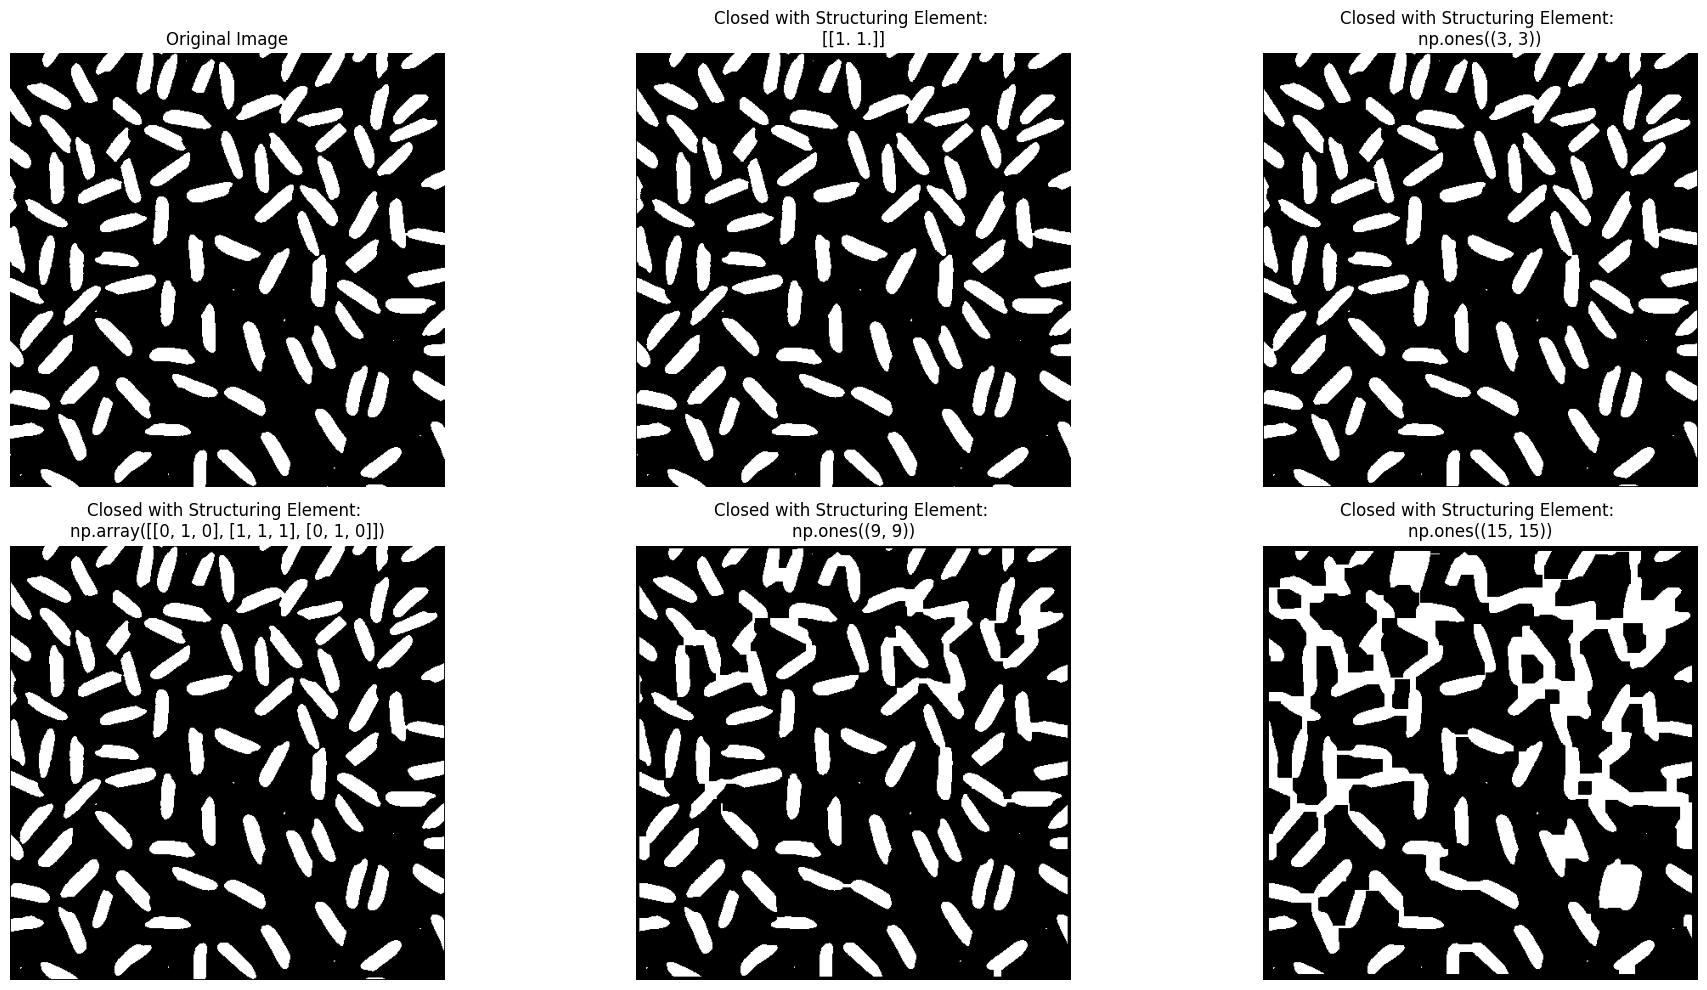

In [169]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.imshow(binary_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

for i in range(len(struct_el)):
    closed_image = CloseBinary(binary_image, struct_el[i])
    plt.subplot(2, 3, i + 2)
    plt.imshow(closed_image, cmap='gray')
    plt.title(f"Closed with Structuring Element: \n{elements[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()